In [1]:
# !pip install sktime
# Imports from SKTime example
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sktime.classification.compose import ColumnEnsembleClassifier
from sktime.classification.dictionary_based import BOSSEnsemble
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.shapelet_based import MrSEQLClassifier
from sktime.datasets import load_basic_motions
from sktime.transformations.panel.compose import ColumnConcatenator


In [6]:
X, y = load_basic_motions(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60, 6) (60,) (20, 6) (20,)


In [18]:
#  multivariate input data
display(X_train.head())
print(f"The type of data in the first cell is {type(X_train.iloc[0][0])}")
print(f"It's apparent that sktime has the expectation that X is \n(1) A dataframe, \n(2) Each row is a measurement, \
      \n(3) Each column is a different dimension to the measurement \n(4) Each cell contains a pandas series")

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
9,0 -0.407421 1 -0.407421 2 2.355158 3...,0 1.413374 1 1.413374 2 -3.928032 3...,0 0.092782 1 0.092782 2 -0.211622 3...,0 -0.066584 1 -0.066584 2 -3.630177 3...,0 0.223723 1 0.223723 2 -0.026634 3...,0 0.135832 1 0.135832 2 -1.946925 3...
24,0 0.383922 1 0.383922 2 -0.272575 3...,0 0.302612 1 0.302612 2 -1.381236 3...,0 -0.398075 1 -0.398075 2 -0.681258 3...,0 0.071911 1 0.071911 2 -0.761725 3...,0 0.175783 1 0.175783 2 -0.114525 3...,0 -0.087891 1 -0.087891 2 -0.503377 3...
5,0 -0.357300 1 -0.357300 2 -0.005055 3...,0 -0.584885 1 -0.584885 2 0.295037 3...,0 -0.792751 1 -0.792751 2 0.213664 3...,0 0.074574 1 0.074574 2 -0.157139 3...,0 0.159802 1 0.159802 2 -0.306288 3...,0 0.023970 1 0.023970 2 1.230478 3...
7,0 -0.352746 1 -0.352746 2 -1.354561 3...,0 0.316845 1 0.316845 2 0.490525 3...,0 -0.473779 1 -0.473779 2 1.454261 3...,0 -0.327595 1 -0.327595 2 -0.269001 3...,0 0.106535 1 0.106535 2 0.021307 3...,0 0.197090 1 0.197090 2 0.460763 3...
34,0 0.052231 1 0.052231 2 -0.54804...,0 -0.730486 1 -0.730486 2 0.70700...,0 -0.518104 1 -0.518104 2 -1.179430 3...,0 -0.159802 1 -0.159802 2 -0.239704 3...,0 -0.045277 1 -0.045277 2 0.023970 3...,0 -0.029297 1 -0.029297 2 0.29829...


The type of data in the first cell is <class 'pandas.core.series.Series'>
It's apparent that sktime has the expectation that X is 
(1) A dataframe, 
(2) Each row is a measurement,       
(3) Each column is a different dimension to the measurement 
(4) Each cell contains a pandas series


In [2]:
# Imports from the EEG data 
%matplotlib inline
import os
import mne
import pandas as pd
from mne.externals.pymatreader import read_mat
import numpy as np
import matplotlib.pyplot as plt
import itertools
from glob import glob
import pyriemann
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.utils import shuffle

In [3]:
data_path = 'C:\\Users\\frank\\code\\NeuroErgonomics_Hackathon_2021'
#'/home/dcas/l.darmet/data/contest/comeptition_done'
n_subs = 1
n_sessions = 2
diff = ['MATBeasy', 'MATBmed', 'MATBdiff']

ch_slice = ['F7', 'F5', 'F3', 'F1', 'F2', 'F4', 'F6', 'AF3', 'AFz', 'AF4','FP1', 'FP2', 'FPz']

(447, 10, 500)
(447, 10, 500)



### I want to place into the dataframe X_df 

* 



In [132]:
X_df = pd.DataFrame(columns = x_names)

sample =  0 
for sample in range(X.shape[0]):
    data = X[sample,:,:]
    list_of_series = []
    for xx in range(X.shape[1]):
        list_of_series.append(X[sample,xx,:])

    X_df = X_df.append(pd.DataFrame([list_of_series], columns = x_names))

# print(len(list_of_series))
X_df.reset_index(drop = True)
display(X_df)



,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9
0,"[-2.4400713443756104e-06, -3.060903787612915e-...","[9.199126243591308e-06, 7.348484992980956e-06,...","[-9.385965347290038e-06, -1.0772482872009277e-...","[-4.2527112960815424e-06, -5.892295360565186e-...","[-4.575579643249511e-06, -5.803393363952637e-0...","[-4.679620265960693e-06, -4.863499641418457e-0...","[-9.331642985343933e-07, -1.3308640718460083e-...","[-1.0349989891052246e-05, -1.1974126815795897e...","[-1.2661298751831053e-05, -1.4399268150329588e...","[-6.116156578063964e-06, -6.606815338134765e-0..."
0,"[-5.401294231414795e-06, -5.042129516601562e-0...","[-7.133672714233398e-06, -7.535453796386719e-0...","[5.497167110443115e-06, 5.2260065078735345e-06...","[-3.2711646556854245e-06, -3.650338649749756e-...","[-4.866089820861816e-06, -4.980174541473388e-0...","[-4.264869213104248e-06, -4.430143356323242e-0...","[-7.591275215148925e-06, -7.970661640167235e-0...","[6.783834934234619e-06, 5.829521656036376e-06,...","[1.1440345048904419e-06, 4.865701198577881e-07...","[2.925589561462402e-06, 2.176889181137085e-06,..."
0,"[-1.1176661252975463e-06, -3.2758567333221435e...","[-1.9520026445388794e-06, -3.5274786949157715e...","[-4.121714115142822e-06, -3.835350275039672e-0...","[-2.938401222229004e-06, -3.6725344657897947e-...","[-6.061538219451904e-06, -6.924684524536132e-0...","[-2.368265151977539e-06, -3.4047589302062986e-...","[-1.4355546236038207e-06, -3.617056608200073e-...","[-2.5085399150848387e-06, -2.9431455135345456e...","[-3.9449565410614016e-06, -4.310895919799805e-...","[-3.4483563899993896e-06, -4.011050224304199e-..."
0,"[7.409985542297363e-06, 5.940413951873779e-06,...","[1.26634464263916e-05, 1.1890037536621094e-05,...","[-8.54087233543396e-07, -2.2678406238555907e-0...","[8.258959770202637e-06, 8.067790985107422e-06,...","[5.387051582336426e-06, 4.9796600341796875e-06...","[5.8357167243957516e-06, 4.939860343933106e-06...","[9.545326232910157e-06, 7.604793548583984e-06,...","[-3.5135679244995117e-06, -4.170119762420654e-...","[3.953509092330932e-06, 2.897797107696533e-06,...","[1.998669743537903e-06, 1.1734731197357176e-06..."
0,"[-3.19535493850708e-06, -3.0968716144561765e-0...","[-6.874592781066895e-06, -8.033589363098144e-0...","[3.486148357391357e-06, 2.2840378284454344e-06...","[-5.350901126861572e-06, -4.470949172973633e-0...","[-4.9581813812255856e-06, -4.3415760993957515e...","[-2.0966021716594694e-07, -3.673954904079437e-...","[-5.018245220184326e-06, -6.1724948883056636e-...","[4.395657181739807e-07, -3.9792677760124206e-0...","[1.6049898862838744e-06, 1.2789376974105833e-0...","[3.8005044460296628e-06, 3.177469491958618e-06..."
...,...,...,...,...,...,...,...,...,...,...
0,"[4.647098541259765e-06, 3.691162347793579e-06,...","[-5.525815010070801e-06, -3.5078079700469968e-...","[9.173828125e-06, 8.071175575256348e-06, 6.047...","[6.256326198577881e-06, 3.684228181838989e-06,...","[7.184259414672851e-06, 6.1630668640136715e-06...","[4.669260025024414e-06, 3.7761876583099364e-06...","[6.617717742919921e-07, -1.2634518146514892e-0...","[7.163755416870117e-06, 6.54724645614624e-06, ...","[1.2320023536682129e-05, 1.1479155540466308e-0...","[5.291219234466553e-06, 4.151639461517334e-06,..."
0,"[2.0973315238952638e-06, 2.083667755126953e-06...","[2.876791954040527e-06, 1.8951313495635985e-06...","[1.0846476256847381e-07, 7.530789375305176e-07...","[7.228649854660034e-07, 5.422736406326294e-07,...","[3.151497542858124e-07, -1.2505990266799925e-0...","[4.2772507667541503e-07, -1.622314155101776e-0...","[3.667919397354126e-06, 3.166150331497192e-06,...","[-8.281298279762268e-07, -1.2092324495315552e-...","[5.981268882751464e-07, 1.4865975379943846e-06...","[9.665740132331848e-07, 7.057781219482422e-07,..."
0,"[1.3282999992370605e-06, -1.7124739289283752e-...","[3.837339878082275e-06, 2.1886093616485596e-06...","[1.7555130720138549e-06, 4.1600131988525387e-0...","[-1.6349284648895264e-06, -2.887855529785156e-...","[-1.5828485488891602e-06, -3.7

In [133]:
Xs2_df = pd.DataFrame(columns = x_names)

sample =  0 
for sample in range(X_s2.shape[0]):
    data = X_s2[sample,:,:]
    list_of_series = []
    for xx in range(X_s2.shape[1]):
        list_of_series.append(X_s2[sample,xx,:])

    Xs2_df = Xs2_df.append(pd.DataFrame([list_of_series], columns = x_names))

# print(len(list_of_series))
Xs2_df.reset_index(drop = True)
display(Xs2_df)





,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9
0,"[-5.020843029022216e-06, -5.092879772186279e-0...","[-1.183825397491455e-05, -1.2093517303466796e-...","[-1.4311062097549439e-06, -1.4334440231323242e...","[-4.30747127532959e-06, -4.64995813369751e-06,...","[3.9233261346817017e-07, 3.9638590812683106e-0...","[-2.5255286693572996e-06, -2.442815065383911e-...","[-6.9707989692687985e-06, -6.768582344055175e-...","[1.0305385589599609e-06, -1.1051934957504272e-...","[-4.1835851669311525e-06, -4.023467540740967e-...","[-2.3594965934753416e-06, -2.318874359130859e-..."
0,"[5.265661716461181e-06, 6.229879379272461e-06,...","[5.651772022247314e-06, 6.859585285186768e-06,...","[-2.4381909370422363e-06, -3.1277859210968015e...","[7.376854419708251e-06, 7.803177356719971e-06,...","[5.234222888946533e-06, 4.6291704177856445e-06...","[5.009993076324463e-06, 5.821772575378418e-06,...","[6.682347297668457e-06, 7.554322242736816e-06,...","[-5.187413215637207e-06, -5.3915848731994625e-...","[1.7049417495727538e-06, 9.990881085395813e-07...","[2.4766137599945066e-06, 2.623610973358154e-06..."
0,"[1.633072257041931e-06, 2.186188220977783e-06,...","[1.582903265953064e-06, 1.986263036727905e-06,...","[-1.4550541639328002e-06, -2.390859842300415e-...","[-1.0936079025268554e-06, -5.170190930366515e-...","[-4.227662086486816e-06, -3.6322972774505615e-...","[-2.4854806065559386e-07, 6.851758360862732e-0...","[7.983213067054748e-07, 1.0925068855285645e-06...","[-2.9999685287475585e-06, -3.5311908721923825e...","[-1.918703436851501e-06, -1.9217275381088254e-...","[-2.070531606674194e-06, -1.7273465394973753e-..."
0,"[-2.0216462612152097e-06, -1.7514337301254272e...","[-5.634979248046874e-06, -4.135021686553955e-0...","[3.15848708152771e-06, 4.701888561248779e-06, ...","[-3.2560324668884275e-06, -2.6083359718322753e...","[-1.0811368227005003e-06, -2.4245281517505646e...","[-1.7309386730194091e-06, -1.757514715194702e-...","[-1.7484318017959593e-06, -1.3344779014587402e...","[3.1331079006195067e-06, 4.1649303436279294e-0...","[3.934388875961303e-06, 4.460590839385986e-06,...","[-1.314319521188736e-07, 6.08865201473236e-07,..."
0,"[2.096583604812622e-06, 4.143001079559326e-06,...","[6.407297611236572e-06, 7.411941051483154e-06,...","[-1.270203948020935e-06, -3.1811404041945933e-...","[2.8004655838012693e-06, 3.8376686573028564e-0...","[3.197111129760742e-06, 4.4887046813964845e-06...","[5.433062314987183e-07, 2.1903610229492187e-06...","[5.376674652099609e-06, 6.294878482818603e-06,...","[-4.010985374450683e-06, -2.671653985977173e-0...","[-2.847102880477905e-06, -1.6639991104602812e-...","[-1.3883702754974364e-06, 2.7270177006721494e-..."
...,...,...,...,...,...,...,...,...,...,...
0,"[1.7634462118148804e-06, 1.4619853496551512e-0...","[2.5159454345703126e-06, 1.3660402297973632e-0...","[7.550673484802246e-06, 6.4464697837829585e-06...","[4.64136791229248e-06, 2.6472649574279785e-06,...","[5.5161886215209955e-06, 2.661959886550903e-06...","[3.6987323760986327e-06, 2.0789337158203126e-0...","[1.97954261302948e-06, 1.2033065557479857e-06,...","[1.1131774187088012e-06, -4.987281858921051e-0...","[3.58298921585083e-06, 1.4278106689453123e-06,...","[6.126858711242675e-06, 3.990717172622681e-06,..."
0,"[3.257409930229187e-07, 4.404971003532409e-07,...","[-2.873725175857544e-06, -7.26306140422821e-07...","[1.203693985939026e-06, 5.239367485046387e-07,...","[1.328155755996704e-06, -1.226022958755493e-06...","[4.56417179107666e-06, 1.9834290742874145e-06,...","[1.196489691734314e-06, 6.865418553352355e-07,...","[-7.081661224365234e-06, -1.9723899364471435e-...","[1.013609766960144e-06, 2.273325204849243e-06,...","[4.274767398834228e-06, 2.9952149391174316e-06...","[1.920918822288513e-06, 8.154654502868652e-07,..."
0,"[5.8909649848937985e-06, 6.603935241699219e-06...","[1.3275565147399902e-05, 1.6564037322998048e-0...","[-3.875128030776977e-06, -1.4288223981857299e-...","[7.3907399177551266e-06, 1.074817943572998e-05...","[2.3281545639038083e-06, 4.795

In [134]:
# X_train, X_test, y_train, y_test = train_test_split(X_df, y, random_state=42)
X_train, X_test, y_train, y_test = X_df, Xs2_df, y, y_s2
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(447, 10) (447,) (447, 10) (447,)


In [135]:
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=100)),
]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.43400447427293065

In [136]:
y_pred = clf.predict(X_test)

In [137]:
confusion_matrix(y_test, y_pred)

array([[122,   8,  19],
       [ 85,  25,  39],
       [ 65,  37,  47]], dtype=int64)

In [138]:
steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=300)),
]
clf = Pipeline(steps)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.4451901565995526

In [ ]:
clf = ColumnEnsembleClassifier(
    estimators=[
        ("TSF0", TimeSeriesForestClassifier(n_estimators=100), [0]),
        ("BOSSEnsemble3", BOSSEnsemble(max_ensemble_size=5), [3]),
    ]
)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# loop through all participants

In [17]:
n_subs = 15

accs = []
# for sub_n, session_n in itertools.product(range(n_subs), range(n_sessions)):
for sub_n in range(n_subs):
    session_n = 0
    epochs_data = []
    labels = []
    for lab_idx, level in enumerate(diff):
        sub = 'P{0:02d}'.format(sub_n+1)
        sess = f'S{session_n+1}'
        path = os.path.join(os.path.join(data_path, sub), sess) + f'/eeg/alldata_sbj{str(sub_n+1).zfill(2)}_sess{session_n+1}_{level}.set'
        # Read the epoched data with MNE
        epochs = mne.io.read_epochs_eeglab(path, verbose=False)
        # You could add some pre-processing here with MNE
        # We will just select some channels (mostly frontal ones)
        epochs = epochs.drop_channels(list(set(epochs.ch_names) -set(ch_slice)))

        # Get the data and concatenante with others MATB levels
        tmp = epochs.get_data()
        epochs_data.extend(tmp)
        labels.extend([lab_idx]*len(tmp))
    
        X = np.array(epochs_data)
#         print(X.shape)
    labels = np.array(labels)
    y = labels
    x_names = [f'dim_{x}' for x in range(X.shape[1])]    
    X_df = pd.DataFrame(columns = x_names)

    sample =  0 
    for sample in range(X.shape[0]):
        data = X[sample,:,:]
        list_of_series = []
        for xx in range(X.shape[1]):
            list_of_series.append(X[sample,xx,:])

        X_df = X_df.append(pd.DataFrame([list_of_series], columns = x_names))

#     # print(len(list_of_series))
    X_df.reset_index(drop = True)
#     #     display(X_df)


    session_n = 1
    epochs_data = []
    labels = []
    for lab_idx, level in enumerate(diff):
        sub = 'P{0:02d}'.format(sub_n+1)
        sess = f'S{session_n+1}'
        path = os.path.join(os.path.join(data_path, sub), sess) + f'/eeg/alldata_sbj{str(sub_n+1).zfill(2)}_sess{session_n+1}_{level}.set'
        # Read the epoched data with MNE
        epochs = mne.io.read_epochs_eeglab(path, verbose=False)
        # You could add some pre-processing here with MNE
        # We will just select some channels (mostly frontal ones)
        epochs = epochs.drop_channels(list(set(epochs.ch_names) -set(ch_slice)))

        # Get the data and concatenante with others MATB levels
        tmp = epochs.get_data()
        epochs_data.extend(tmp)
        labels.extend([lab_idx]*len(tmp))
    
        X_s2 = np.array(epochs_data)
#         print(X_s2.shape)
    labels = np.array(labels)
    y_s2 = labels


    Xs2_df = pd.DataFrame(columns = x_names)

    sample =  0 
    for sample in range(X_s2.shape[0]):
        data = X_s2[sample,:,:]
        list_of_series = []
        for xx in range(X_s2.shape[1]):
            list_of_series.append(X_s2[sample,xx,:])

        Xs2_df = Xs2_df.append(pd.DataFrame([list_of_series], columns = x_names))

#     # print(len(list_of_series))
    Xs2_df.reset_index(drop = True)
#     display(Xs2_df)
        
    X_train, X_test, y_train, y_test = X_df, Xs2_df, y, y_s2
    
    X_test, y_test = shuffle(X_test, y_test, random_state=0)
    
#     print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    steps = [
    ("concatenate", ColumnConcatenator()),
    ("classify", TimeSeriesForestClassifier(n_estimators=400, random_state=0, n_jobs=-1)),
    ]
    clf = Pipeline(steps)

    clf.fit(X_train, y_train)
    accs.append(clf.score(X_test, y_test))
    print(accs[-1])
    


0.465324384787472
0.4429530201342282
0.4899328859060403
0.4809843400447427
0.3400447427293065
0.5346756152125279
0.5279642058165548
0.5257270693512305
0.3870246085011186
0.4272930648769575
0.5749440715883669
0.47651006711409394
0.40492170022371365
0.48322147651006714
0.4407158836689038


0.4668158090976882


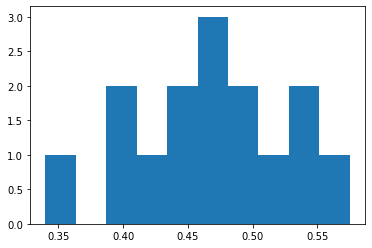

In [22]:
plt.hist(accs)
print(np.mean(accs))


In [ ]:
accs at n_estimators = 200

0.4563758389261745
0.436241610738255
0.47651006711409394
0.47874720357941836
0.34451901565995524
0.5033557046979866
0.5324384787472036
0.5055928411633109
0.378076062639821
0.4004474272930649
0.5771812080536913
0.465324384787472
0.4161073825503356
0.4697986577181208
0.42058165548098436